In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [6]:


path = os.listdir('dataset/train-data')
classes = {'zero':0, 'one':1}

In [7]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/train-data/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [8]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
print(len(X))
print(len(Y))

12952
12952


In [9]:
np.unique(Y)

array([0, 1])

In [10]:
import pandas as pd
pd.Series(Y).value_counts()

1    7922
0    5030
Name: count, dtype: int64

In [11]:
X.shape, X_updated.shape

((12952, 200, 200), (12952, 40000))

In [12]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(12952, 40000)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [14]:
xtrain.shape, xtest.shape


((9066, 40000), (3886, 40000))

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Random forest

In [16]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain, ytrain)
rf_pred = rf_classifier.predict(xtest)
rf_accuracy = accuracy_score(ytest, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.903242408646423


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Compute evaluation metrics
accuracy = accuracy_score(ytest, rf_pred)
precision = precision_score(ytest, rf_pred)
recall = recall_score(ytest, rf_pred)
f1 = f1_score(ytest, rf_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.903242408646423
Precision: 0.8917423943105491
Recall: 0.956761339550657
F1 Score: 0.9231083844580777


ANN model

In [18]:
# Artificial Neural Network (ANN)
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=xtrain[0].shape),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_history = ann_model.fit(xtrain, ytrain, validation_split=0.2, epochs=10, batch_size=32)
ann_accuracy = ann_model.evaluate(xtest, ytest)[1]
print("ANN Accuracy:", ann_accuracy)

Epoch 1/10
227/227 [==============================] - 16s 62ms/step - loss: 0.7036 - accuracy: 0.6298 - val_loss: 0.6019 - val_accuracy: 0.6874
Epoch 2/10
227/227 [==============================] - 12s 54ms/step - loss: 0.6043 - accuracy: 0.6710 - val_loss: 0.5665 - val_accuracy: 0.6940
Epoch 3/10
227/227 [==============================] - 13s 57ms/step - loss: 0.6088 - accuracy: 0.6710 - val_loss: 0.5756 - val_accuracy: 0.6913
Epoch 4/10
227/227 [==============================] - 13s 56ms/step - loss: 0.5568 - accuracy: 0.6986 - val_loss: 0.5461 - val_accuracy: 0.7128
Epoch 5/10
227/227 [==============================] - 12s 55ms/step - loss: 0.5454 - accuracy: 0.7027 - val_loss: 0.5290 - val_accuracy: 0.7222
Epoch 6/10
227/227 [==============================] - 13s 55ms/step - loss: 0.5275 - accuracy: 0.7128 - val_loss: 0.5207 - val_accuracy: 0.7095
Epoch 7/10
227/227 [==============================] - 13s 56ms/step - loss: 0.4993 - accuracy: 0.7323 - val_loss: 0.5019 - val_accuracy:

In [19]:
# Predict on test data using Random Forest
rf_test_pred = rf_classifier.predict(xtest)
rf_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [20]:

# Print accuracy of predictions
print("Random Forest Test Accuracy:", accuracy_score(ytest, rf_test_pred))

Random Forest Test Accuracy: 0.903242408646423


In [21]:
dec = {0:'Zero methylation', 1:'One methylation'}

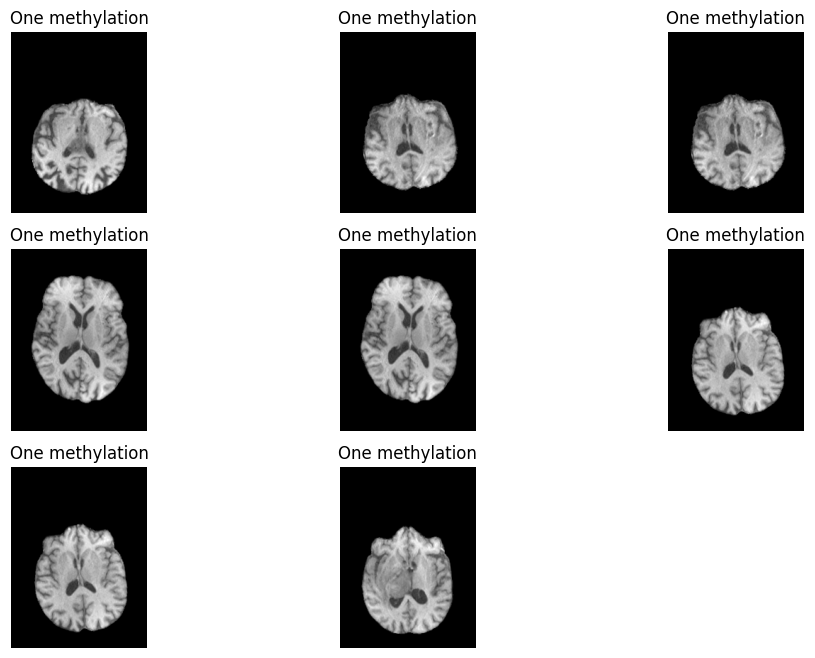

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
p = os.listdir('dataset/test-data/test/')
c=1
for i in os.listdir('dataset/test-data/test/')[100:108]:
    plt.subplot(3,3,c)
    
    # print(i[0])
    img = cv2.imread('dataset/test-data/test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf_test_pred
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [23]:

# Predict on test data using ANN
ann_test_pred = (ann_model.predict(xtest) > 0.5).astype("int32")

122/122 [==============================] - 1s 6ms/step


In [24]:
print("ANN Test Accuracy:", accuracy_score(ytest, ann_test_pred))

ANN Test Accuracy: 0.7678847143592383


In [35]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann_model.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(ytest, y_pred_classes))

122/122 [==============================] - 1s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      1.00      0.56      1527
           1       0.00      0.00      0.00      2359

    accuracy                           0.39      3886
   macro avg       0.20      0.50      0.28      3886
weighted avg       0.15      0.39      0.22      3886



c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera